In [35]:
#To upload the Dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras import backend as K
#for model Building
#Sequential is to build the model layer by layer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#Dense is used to represents fully connected Layer
from keras.layers import Dense, Dropout, Activation, Flatten
import os
import pathlib

In [36]:
#load the Dataset
tf.keras.datasets.cifar100.load_data(label_mode='fine')

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [37]:
#Split the Dataset into Train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [38]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

<ipython-input-39-8849e07d285d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


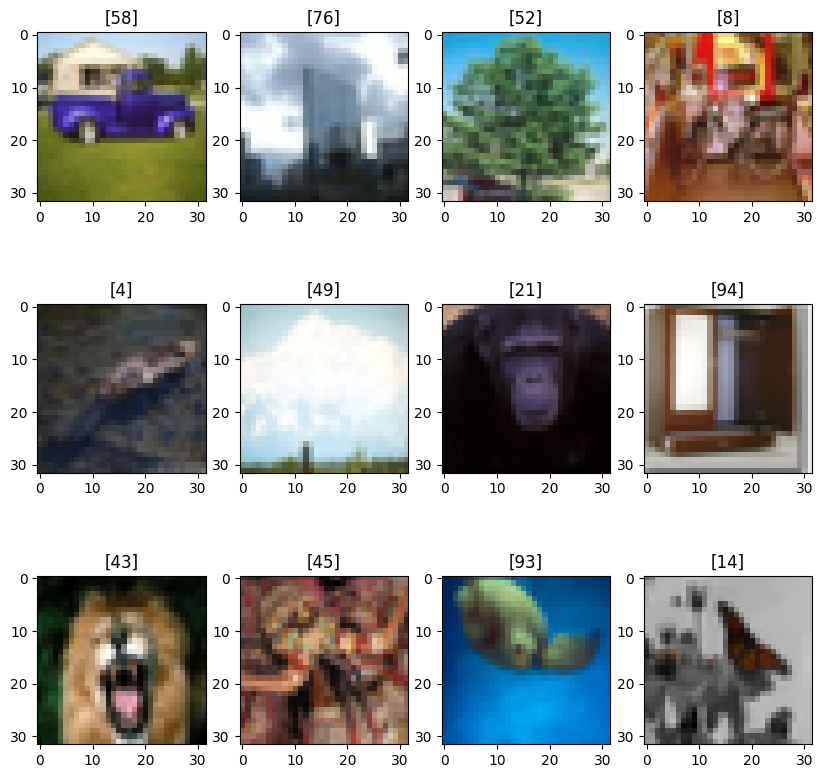

In [39]:
import matplotlib.pyplot as plt
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.show()
show_samples(x_train, y_train)

In [40]:
#assign the batch_size
batchsize = 128
#assign the number of classes
num_classes = 100
#define epoch
epoch= 10
#define rows and columns
img_rows, img_cols = 32, 32

pre-prossesing

In [41]:
#Shape of the x_train data
x_train.shape

(50000, 32, 32, 3)

In [42]:
#Shape of the x_test data
x_test.shape

(10000, 32, 32, 3)

In [43]:
 # reshape the training datas and testing data
new_shape = (50000, 32*32*3)
new_shape1 = (10000, 32*32*3)
x_train_reshaped = x_train.reshape(new_shape)
x_test_reshaped = x_test.reshape(new_shape1)


In [44]:
#Sequential is to build the model layer by layer
model = tf.keras.models.Sequential()
#First layer
model.add(Conv2D(128, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Hidden layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#dense is used to represents fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [45]:
#To show the denmenssions
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_3 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        73792     
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                      

In [46]:
#Compile the model to train the datas
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [47]:
#Converting the numerical to float
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped= x_test_reshaped.astype('float32')

In [48]:
x_train_reshaped

array([[255., 255., 255., ..., 138., 173.,  79.],
       [255., 255., 255., ..., 255., 255., 255.],
       [250., 250., 248., ..., 232., 230., 228.],
       ...,
       [248., 244., 242., ..., 204., 205., 205.],
       [156., 154., 137., ..., 163., 154., 126.],
       [ 31.,  67., 122., ...,  40.,  37.,  67.]], dtype=float32)

In [49]:
#Divide the pixels range form 0 to 1
x_train_reshaped /= 255
x_test_reshaped /= 255

In [50]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [51]:
print(x_test_reshaped.shape)
print(y_test_one_hot.shape)
print(x_train_reshaped.shape)
print(y_train_one_hot.shape)

(10000, 3072)
(10000, 100)
(50000, 3072)
(50000, 100)


In [52]:
model.fit(x_train, y_train_one_hot, batch_size=batchsize , epochs=epoch, validation_data=(x_test, y_test_one_hot))


Epoch 1/10
391/391 [==============================] - 14s 30ms/step - loss: 4.7153 - accuracy: 0.0380 - val_loss: 3.9207 - val_accuracy: 0.1017
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 3.8816 - accuracy: 0.1040 - val_loss: 3.5862 - val_accuracy: 0.1690
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 3.5527 - accuracy: 0.1610 - val_loss: 3.2565 - val_accuracy: 0.2248
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 3.3269 - accuracy: 0.2005 - val_loss: 3.0919 - val_accuracy: 0.2593
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 3.1663 - accuracy: 0.2311 - val_loss: 2.9872 - val_accuracy: 0.2775
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 3.0284 - accuracy: 0.2597 - val_loss: 2.9036 - val_accuracy: 0.2903
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 2.9034 - accuracy: 0.2796 - val_loss: 2.8270 - val_accuracy:

In [54]:
model.save('Cifar__CNN.h5')

In [55]:
p=model.predict(x_train)
p

1563/1563 [==============================] - 4s 3ms/step


array([[2.2008540e-03, 6.6932576e-04, 5.4826052e-03, ..., 1.9380644e-02,
        1.7508229e-03, 2.9002031e-04],
       [2.1244381e-07, 1.5793999e-06, 1.6584336e-05, ..., 1.3054385e-04,
        5.5071741e-05, 9.1640430e-08],
       [1.9863044e-01, 5.3236606e-03, 2.2394866e-02, ..., 2.8454826e-05,
        2.5441854e-03, 9.6354529e-04],
       ...,
       [4.3551391e-03, 2.7379824e-03, 1.7792161e-03, ..., 2.0435681e-03,
        4.0410748e-03, 2.9863459e-03],
       [3.7142239e-05, 1.6236297e-03, 2.1647322e-03, ..., 7.7031134e-03,
        2.8027678e-03, 2.8932062e-03],
       [1.0453037e-06, 7.1564532e-04, 9.3618248e-05, ..., 2.3065572e-06,
        1.2242595e-04, 1.5325065e-02]], dtype=float32)

In [56]:
p[0]

array([2.20085401e-03, 6.69325760e-04, 5.48260519e-03, 1.05273025e-02,
       3.83777474e-03, 3.34035861e-03, 1.93777634e-03, 1.73212809e-03,
       1.66940372e-02, 1.35287759e-03, 6.21749961e-04, 5.94503107e-03,
       5.77995228e-03, 1.50820855e-02, 2.36689346e-03, 5.74745834e-02,
       1.07039488e-03, 1.36350356e-02, 4.76776157e-03, 1.02318309e-01,
       3.98944219e-04, 9.02404450e-03, 2.43665255e-03, 8.25936906e-04,
       1.03805854e-04, 8.59675556e-03, 2.05177558e-03, 5.88907301e-03,
       1.85371886e-04, 1.74788497e-02, 6.02446031e-04, 5.56139369e-03,
       7.73979677e-03, 6.22128136e-03, 5.51111903e-03, 1.30987708e-02,
       2.17231619e-03, 8.24918300e-02, 2.07001716e-02, 3.37555422e-03,
       2.76740803e-03, 4.60926769e-03, 2.56260042e-03, 5.87121211e-03,
       1.31894823e-03, 4.62784059e-03, 1.53286876e-02, 1.77774066e-03,
       2.31795236e-02, 4.56278306e-03, 1.60520501e-03, 1.53242722e-02,
       1.21038058e-03, 1.51152344e-04, 2.92627886e-03, 3.46301100e-03,
      

In [57]:
arr=np.argmax(p[1])

In [58]:
arr

29

In [59]:
y_train[1][0]

29

In [60]:
model.save('cifar_Cnn.h5')